Read the saved boxes that Ross Girshick provides, and match them to the Pascal VOC data that we have.

In [28]:
import os
import utils
import importlib
importlib.reload(utils)
from utils import *
from scipy import io
import numpy as np
import PIL
from IPython.core.debugger import Tracer

### Load up the saved Selective Search boxes

In [10]:
saved_boxes = io.loadmat('intermediate/voc_2012_trainval.mat')
images = saved_boxes['images']
image_boxes = saved_boxes['boxes']

In [108]:
len(image_boxes), len(images)

(11540, 11540)

### Load filenames

In [6]:
filenames = load_array('intermediate/voc/filenames.bcolz')

In [11]:
filenames_dict = {v:k for k,v in enumerate(filenames)}

### Map the SS boxes to the filenames array

In [32]:
def resize_rois(rois, original_size, new_size):
    ''' Resize the bboxes to a specified size'''
    resized_rois = []
    for roi in rois:
        resized_roi = resize_bbox(roi, original_size, new_size)
        resized_rois.append(resized_roi)
    return resized_rois

Map the bboxes to the filenames array.

In [ ]:
images_dir = './data/VOC2012/JPEGImages'
ordered_boxes = [None] * len(filenames)
for image, boxes in zip(images, image_boxes):
    # Find the fullpath for the image
    filename = image[0][0] + '.jpg'
    boxes = boxes[0]
    fullpath = os.path.join(images_dir, filename)
    
    # Get size of this image
    current_size = get_image_size(fullpath)
    new_size = (500, 500)
    
    # Find the index of this image 
    filenames_index = filenames_dict[fullpath]
    
    resized_rois = resize_rois(boxes, current_size, new_size)
    ordered_boxes[filenames_index] = resized_rois    

In [ ]:
len(ordered_boxes)

In [118]:
save_array('intermediate/voc/external_ss_boxes_resized.bcolz', ordered_boxes)

In [3]:
ordered_boxes = load_array('intermediate/voc/external_ss_boxes_resized_500x500.bcolz')

##### Review

In [18]:
ordered_boxes[2]

[array([  1,  62, 249, 666], dtype=uint16),
 array([118, 322, 143, 361], dtype=uint16),
 array([287, 282, 375, 666], dtype=uint16),
 array([ 29, 349,  82, 502], dtype=uint16),
 array([ 49,  58, 252, 616], dtype=uint16),
 array([  1, 408, 283, 666], dtype=uint16),
 array([321, 282, 341, 329], dtype=uint16),
 array([162, 420, 225, 450], dtype=uint16),
 array([  1,   1, 375, 666], dtype=uint16),
 array([116, 318, 183, 426], dtype=uint16),
 array([217, 149, 375, 666], dtype=uint16),
 array([  1,   1, 283, 666], dtype=uint16),
 array([  1,   1, 375, 461], dtype=uint16),
 array([ 89, 108, 141, 322], dtype=uint16),
 array([246, 280, 293, 346], dtype=uint16),
 array([ 73,  49, 150, 316], dtype=uint16),
 array([  1, 412, 283, 666], dtype=uint16),
 array([  1, 282, 375, 666], dtype=uint16),
 array([ 65,  49, 375, 580], dtype=uint16),
 array([ 63, 438, 169, 542], dtype=uint16),
 array([164,  65, 187, 293], dtype=uint16),
 array([  1, 517, 125, 581], dtype=uint16),
 array([126, 500, 283, 666], dty

In [20]:
PIL.Image.open(filename).size

(500, 375)

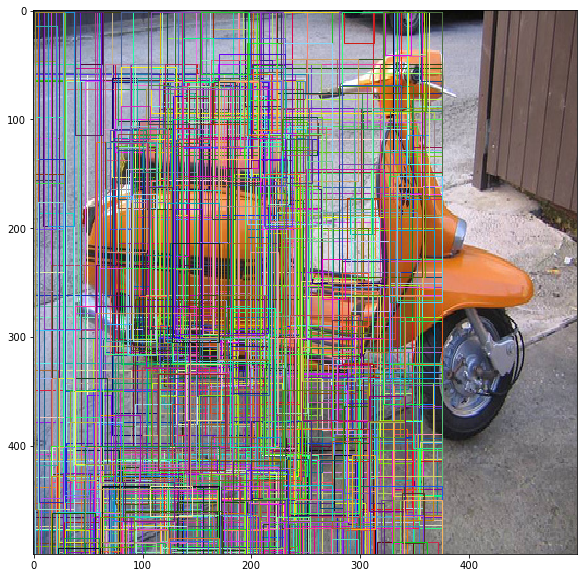

In [19]:
img_index = 2
filename = filenames[img_index]
rois = ordered_boxes[img_index]
image = PIL.Image.open(filename).resize((500, 500))

display_image_regions(image, rois)